# Problem Statement

#### Heart failure is a critical health condition affecting millions worldwide, often leading to severe complications and death. Early prediction of patient survival based on clinical features can significantly improve medical decision-making and treatment planning.
#### This dataset contains 1199 patient records with 13 medical and demographic variables related to heart failure. The primary goal is to analyze these factors and determine their influence on patient survival. Specifically, we aim to:
#### 1) Identify key risk factors that contribute to heart failure mortality.
#### 2) Explore relationships between medical variables (e.g., age, serum creatinine, ejection fraction) and survival outcomes.
#### 3) Develop predictive insights for identifying high-risk patients based on available clinical data.
#### By analyzing this dataset, healthcare professionals can gain a deeper understanding of heart failure risk factors and improve early intervention strategies to reduce mortality rates.

In [1]:
# Loading Python Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset and display first 5 rows
dataset=pd.read_csv("Heart Failure Clinical Records.csv")
dataset.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [3]:
# Examining randowm rows and at the end of the dataset
dataset.sample(10)
dataset.tail(5)

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
294                    1   155000.0               1.1           143    1   
295                    0   270000.0               1.2           139    0   
296                    0   742000.0               0.8           138    0   
297                    0   140000.0               1.4           140    1   
298                    0   395000.0               1.6           136    1   

     smoking  time  DEATH_EVENT  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0

In [4]:
# viewing the data
dataset.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [5]:
# Shape of the data
a=dataset.shape

In [6]:
# Information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [7]:
# Data Statistics 
dataset.describe()

age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.000000  212500.000000   
50%            38.000000             0.000000  262000.000000   
75%            45.000000             1.000000  303500.000000   
max            80.000000             1.000000  850000.000000   

       serum_creatinine  serum_sodium         sex    smoking        time  \
count         299.00000    299.000000  299.000000  299.00000  299.000000   
mean            1.39388    136.625418    0.648829    0.32107  130.260870   
std             1.03451      4.412477    0.478136    0.46767   77.614208   
min             0.50000    113.000000    0.000000    0.00000    4.000000   
25%             0.90000    134.000000    0.000000    0.00000   73.000000   
50%             1.10000    137.000000    1.000000    0.00000  115.000000   
75%             1.40000    140.000000    1.000000    1.00000  203.000000   
max             9.40000    148.000000    1.000000    1.00000  285.000000   

       DEATH_EVENT  
count    299.00000  
mean       0.32107  
std        0.46767  
min        0.00000  
25%        0.00000  
50%        0.00000  
75%        1.00000  
max        1.00000

In [8]:
# Missing values of dataset
missing_values = dataset.isnull().sum()
print(missing_values)

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64


In [9]:
# Examining the dataset for duplicaterows and dropping the duplicates
duplicate_rows= dataset.duplicated().sum()
print(duplicate_rows)

0


In [10]:
dataset.drop_duplicates()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                      1  265000.00               1.9           130    1   
1                      0  263358.03               1.1           136    1   
2                      0  162000.00               1.3           129    1   
3                      0  210000.00               1.9           137    1   
4                      0  327000.00               2.7           116    0   
..                   ...        ...               ...           ...  ...   
294                    1  155000.00               1.1           143    1   
295                    0  270000.00               1.2           139    0   
296                    0  742000.00               0.8           138    0   
297                    0  140000.00               1.4           140    1   
298                    0  395000.00               1.6           136    1   

     smoking  time  DEATH_EVENT  
0          0     4            1  
1          0     6            1  
2          1     7            1  
3          0     7            1  
4          0     8            1  
..       ...   ...          ...  
294        1   270            0  
295        0   271            0  
296        0   278            0  
297        1   280            0  
298        1   285            0  

[299 rows x 13 columns]

In [11]:
# NAN values check
print(dataset.isna())

       age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    False    False                     False     False              False   
1    False    False                     False     False              False   
2    False    False                     False     False              False   
3    False    False                     False     False              False   
4    False    False                     False     False              False   
..     ...      ...                       ...       ...                ...   
294  False    False                     False     False              False   
295  False    False                     False     False              False   
296  False    False                     False     False              False   
297  False    False                     False     False              False   
298  False    False                     False     False              False   

     high_blood_pressure  platelets  serum_creatinine  serum_so

In [12]:
# infinity values check
dataset.isin([np.inf,-np.inf])
print(dataset)

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0    75.0        0                       582         0                 20   
1    55.0        0                      7861         0                 38   
2    65.0        0                       146         0                 20   
3    50.0        1                       111         0                 20   
4    65.0        1                       160         1                 20   
..    ...      ...                       ...       ...                ...   
294  62.0        0                        61         1                 38   
295  55.0        0                      1820         0                 38   
296  45.0        0                      2060         1                 60   
297  45.0        0                      2413         0                 38   
298  50.0        0                       196         0                 45   

     high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \

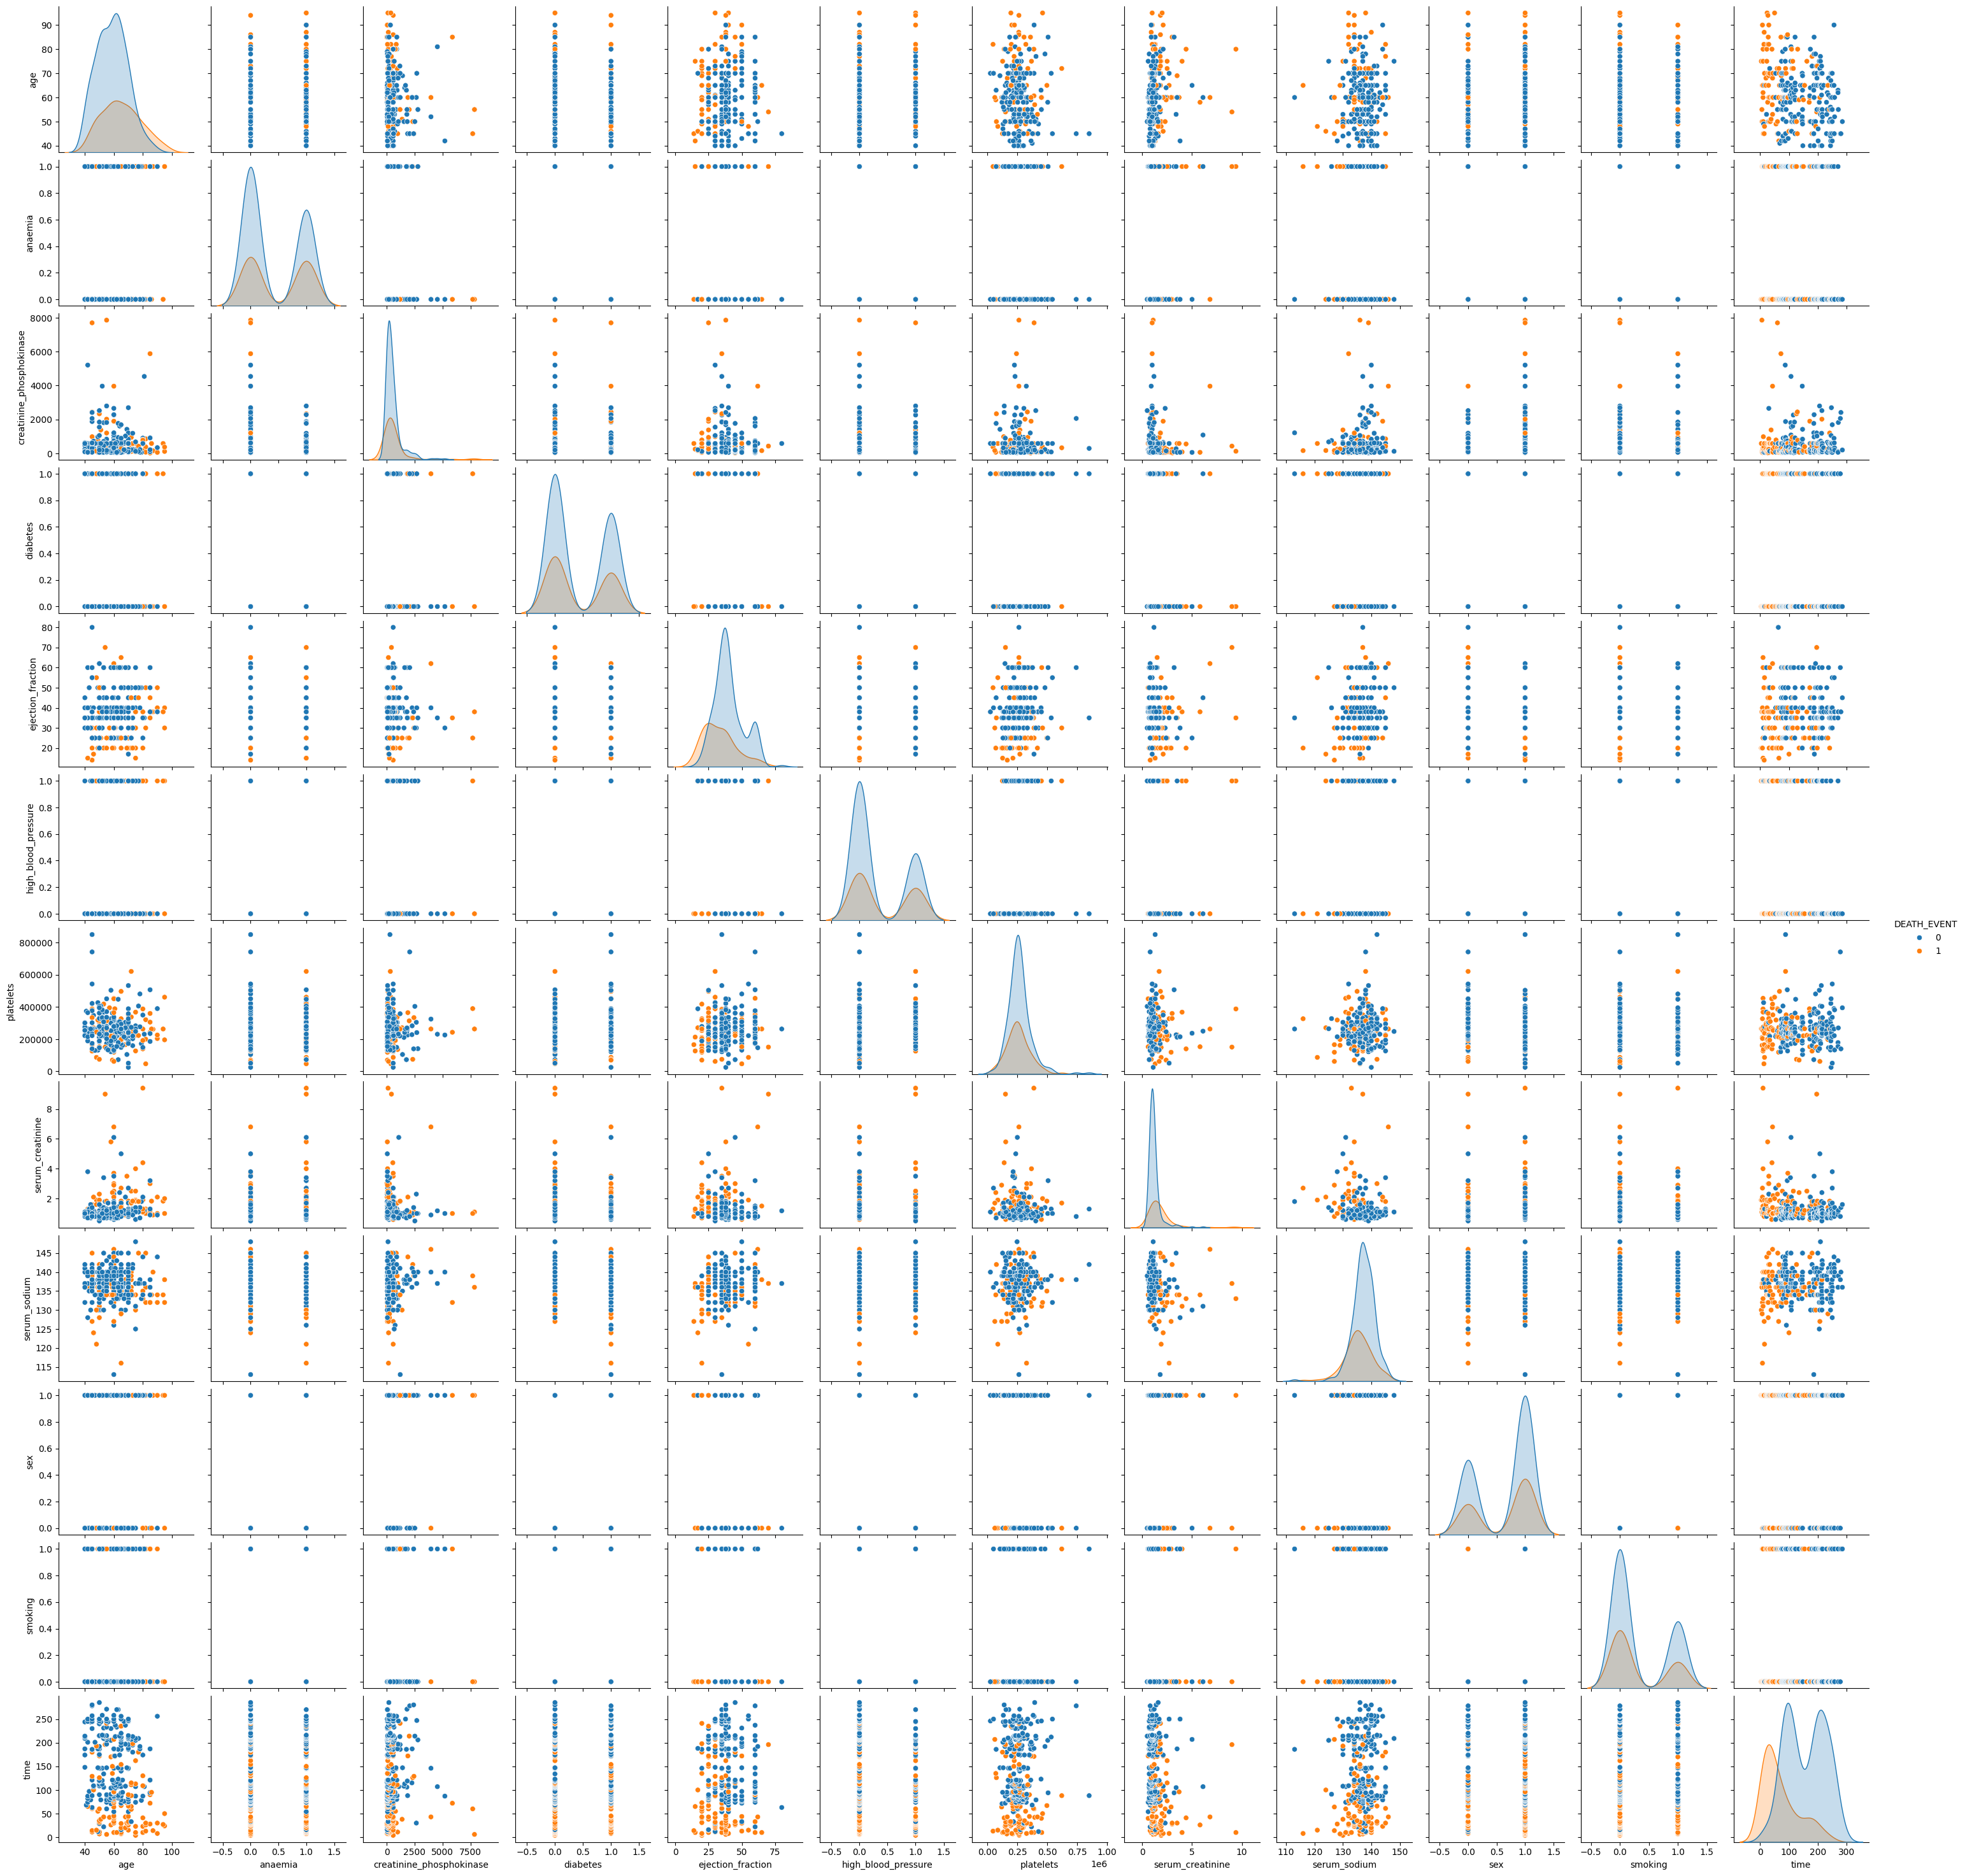

In [13]:
sns.pairplot(data=dataset,hue="DEATH_EVENT")

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'anaemia'}>,
        <Axes: title={'center': 'creatinine_phosphokinase'}>,
        <Axes: title={'center': 'diabetes'}>],
       [<Axes: title={'center': 'ejection_fraction'}>,
        <Axes: title={'center': 'high_blood_pressure'}>,
        <Axes: title={'center': 'platelets'}>,
        <Axes: title={'center': 'serum_creatinine'}>],
       [<Axes: title={'center': 'serum_sodium'}>,
        <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'smoking'}>,
        <Axes: title={'center': 'time'}>],
       [<Axes: title={'center': 'DEATH_EVENT'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

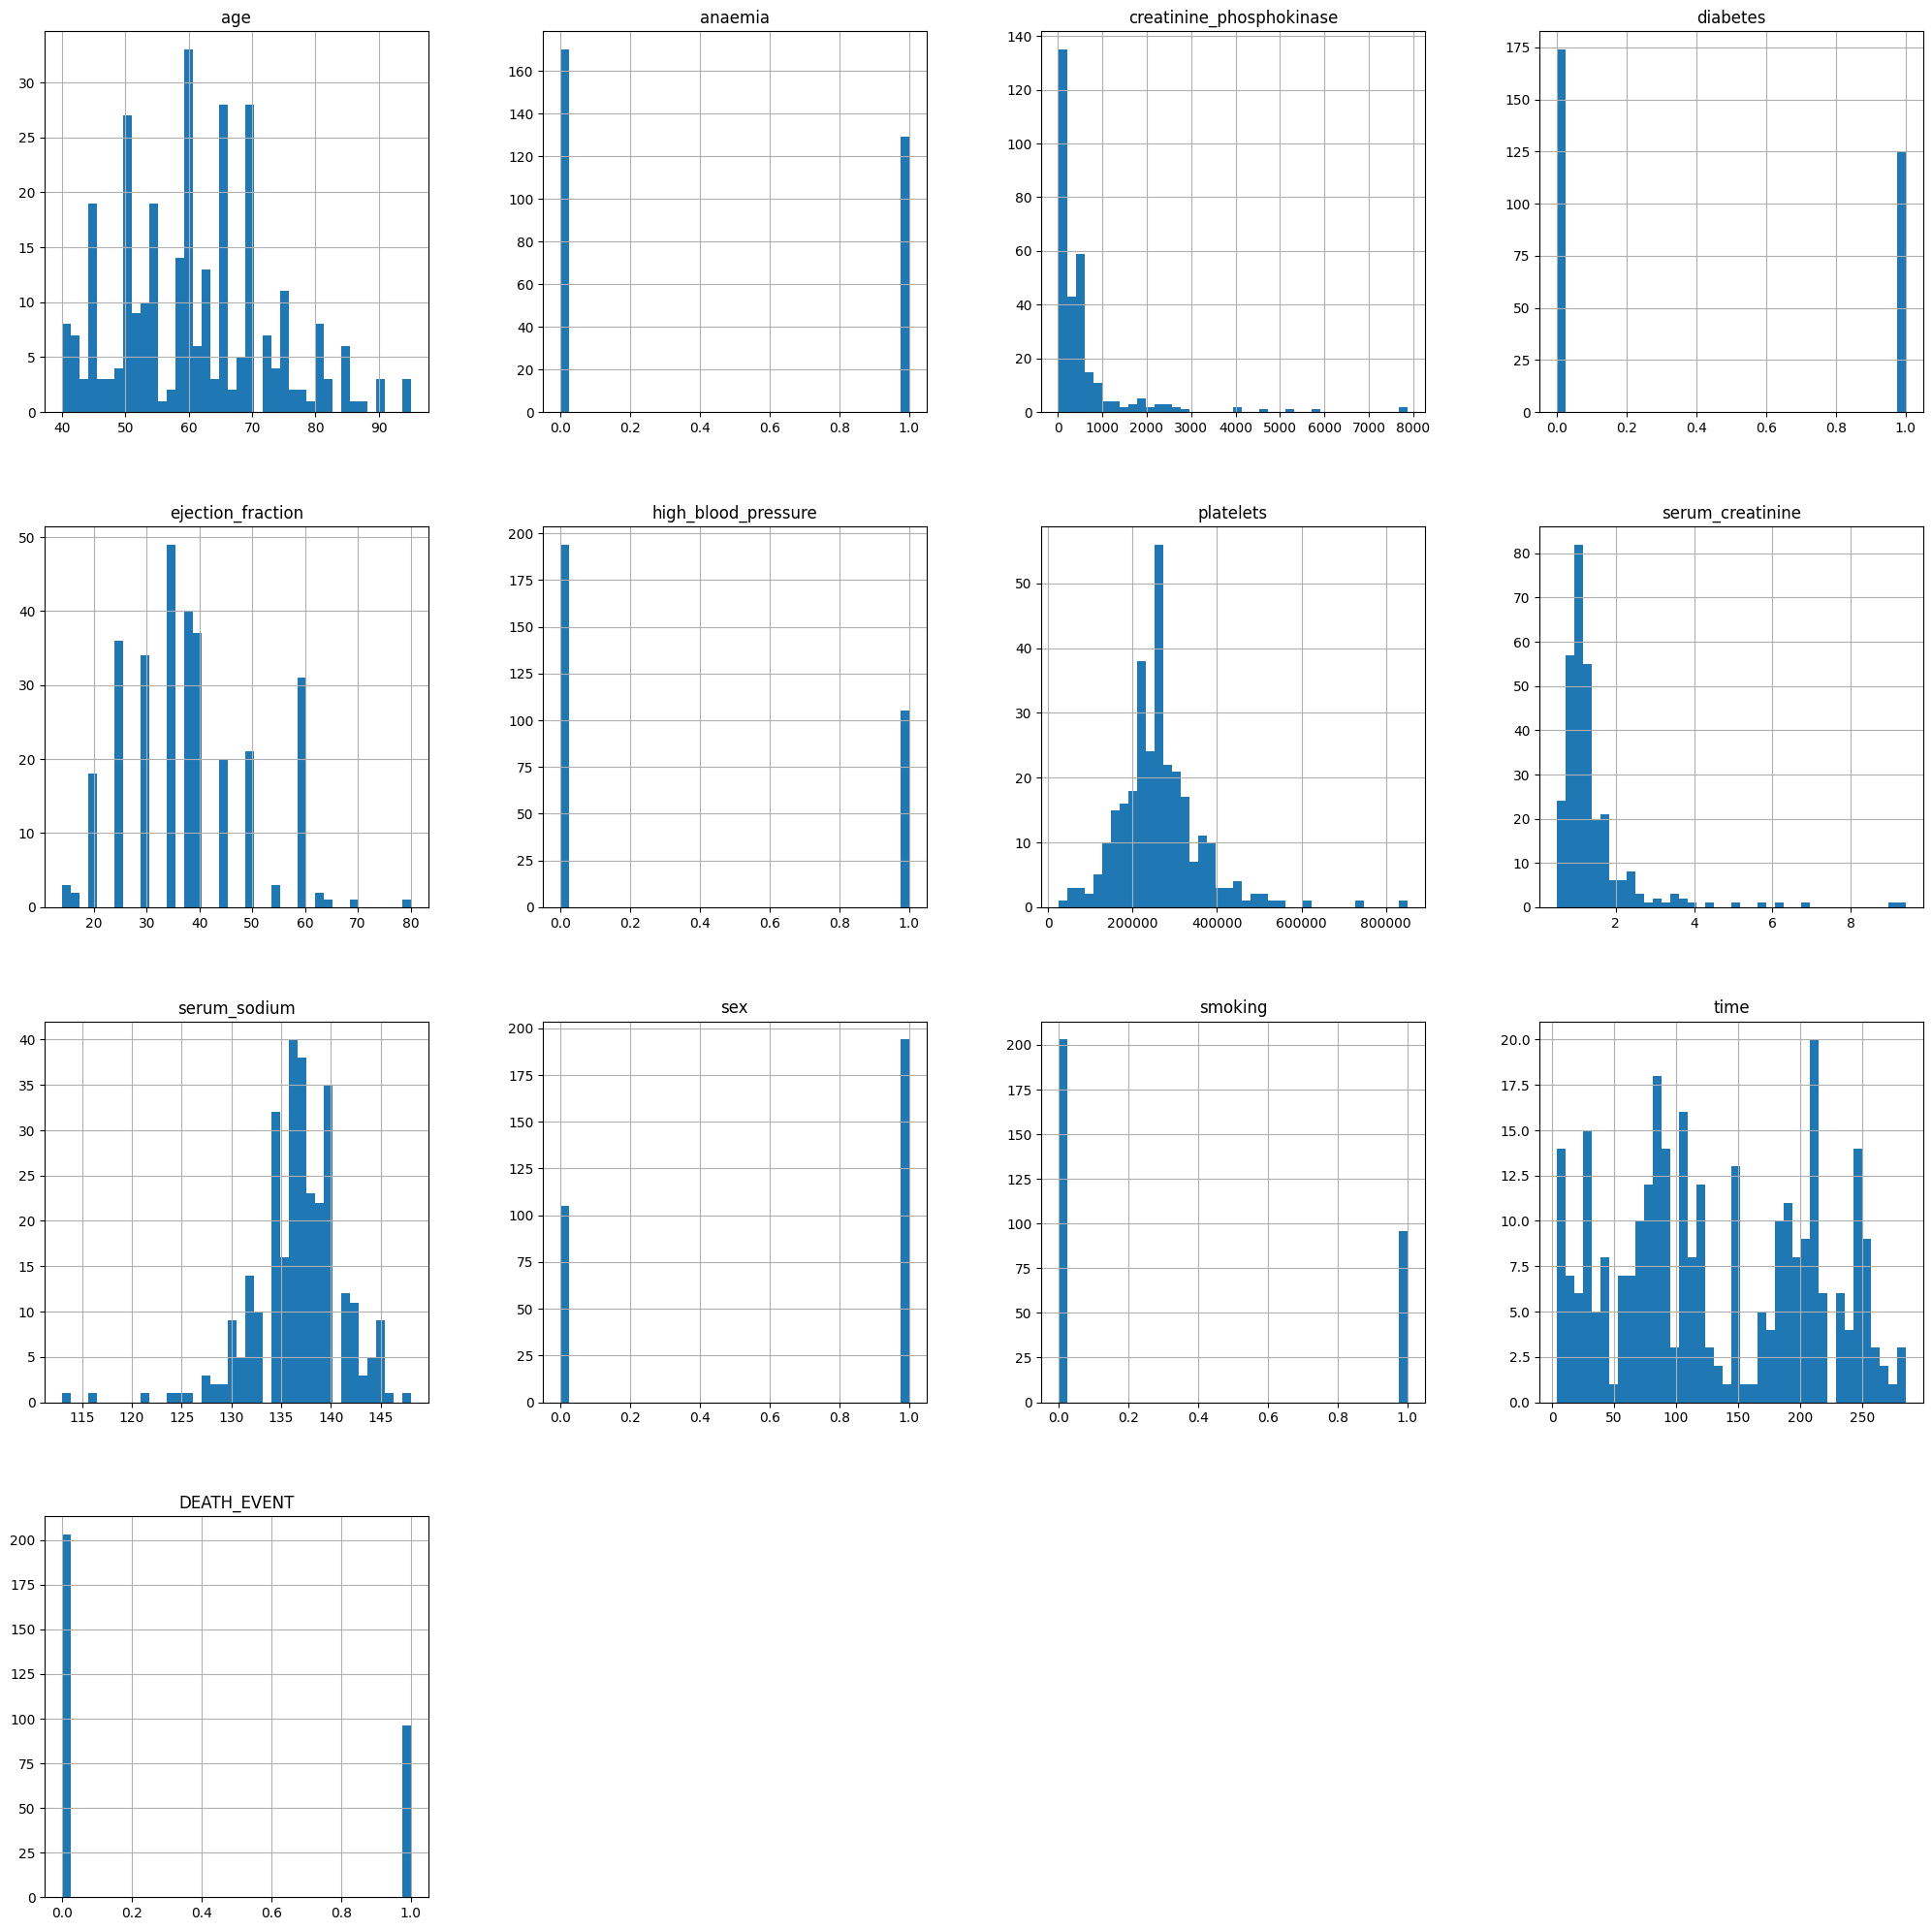

In [14]:
# generating histogram plots
dataset.hist(bins=40, figsize=(25,25))

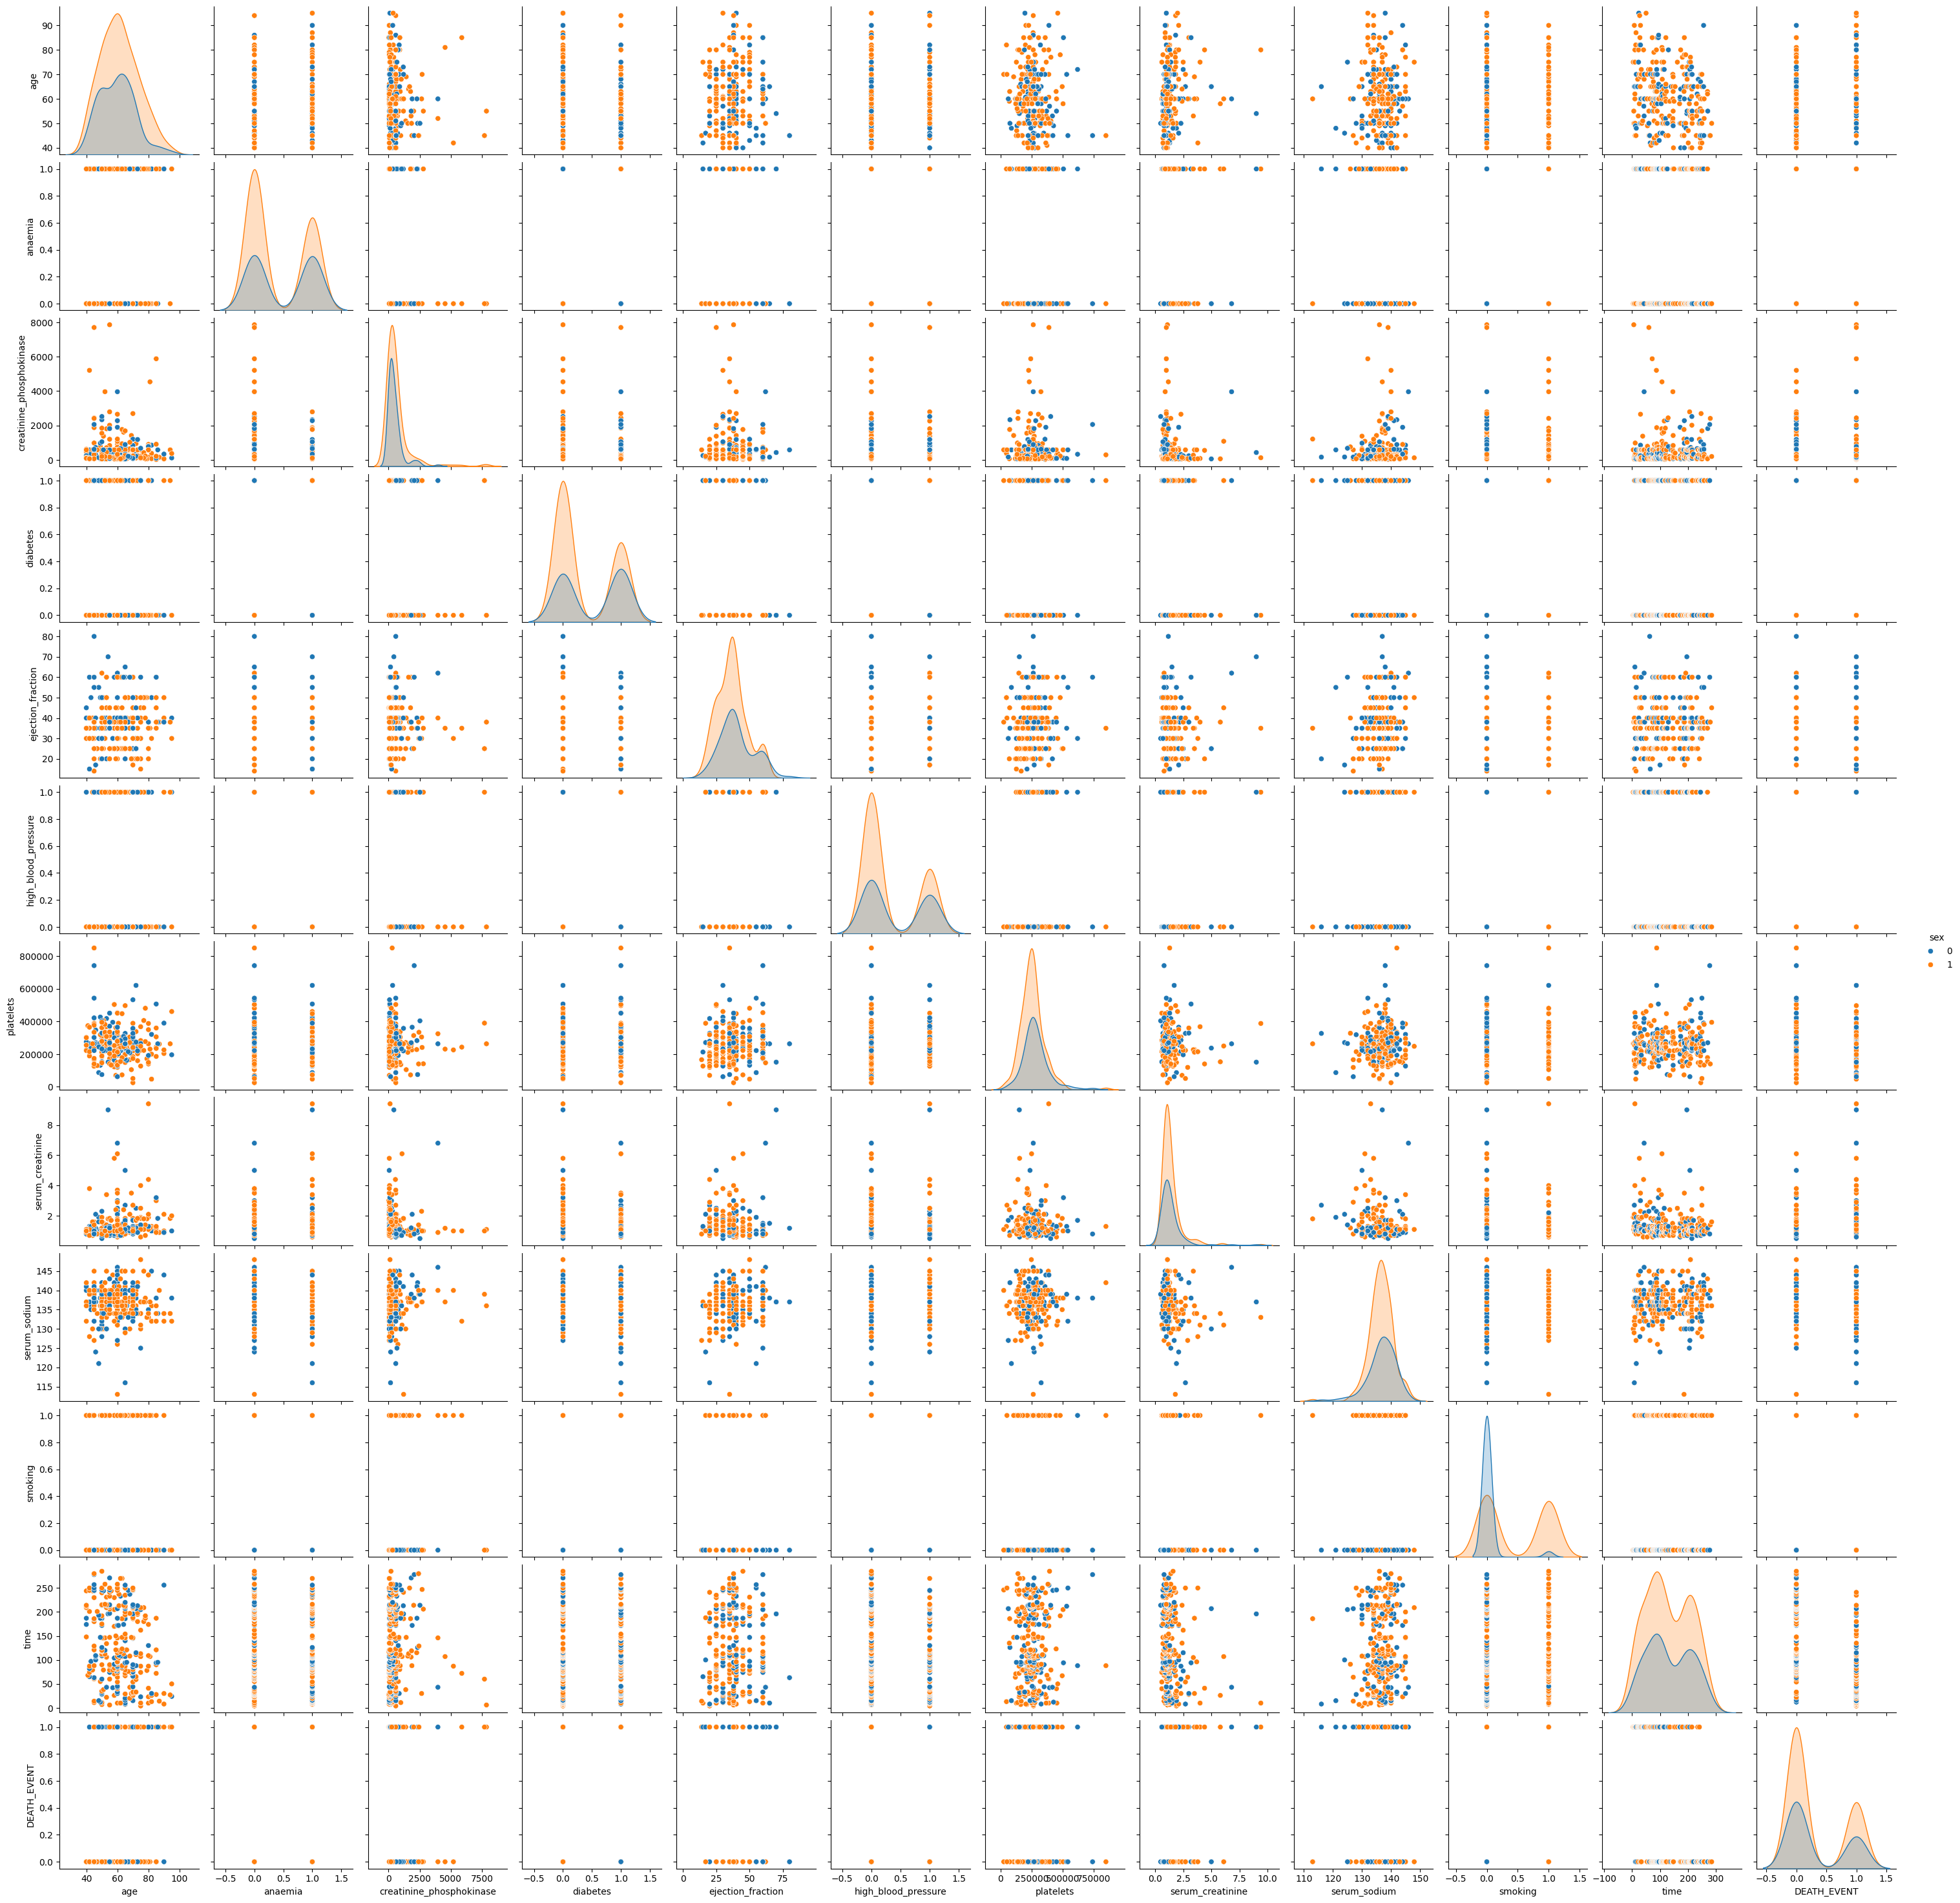

In [15]:
sns.pairplot(data=dataset,hue="sex")

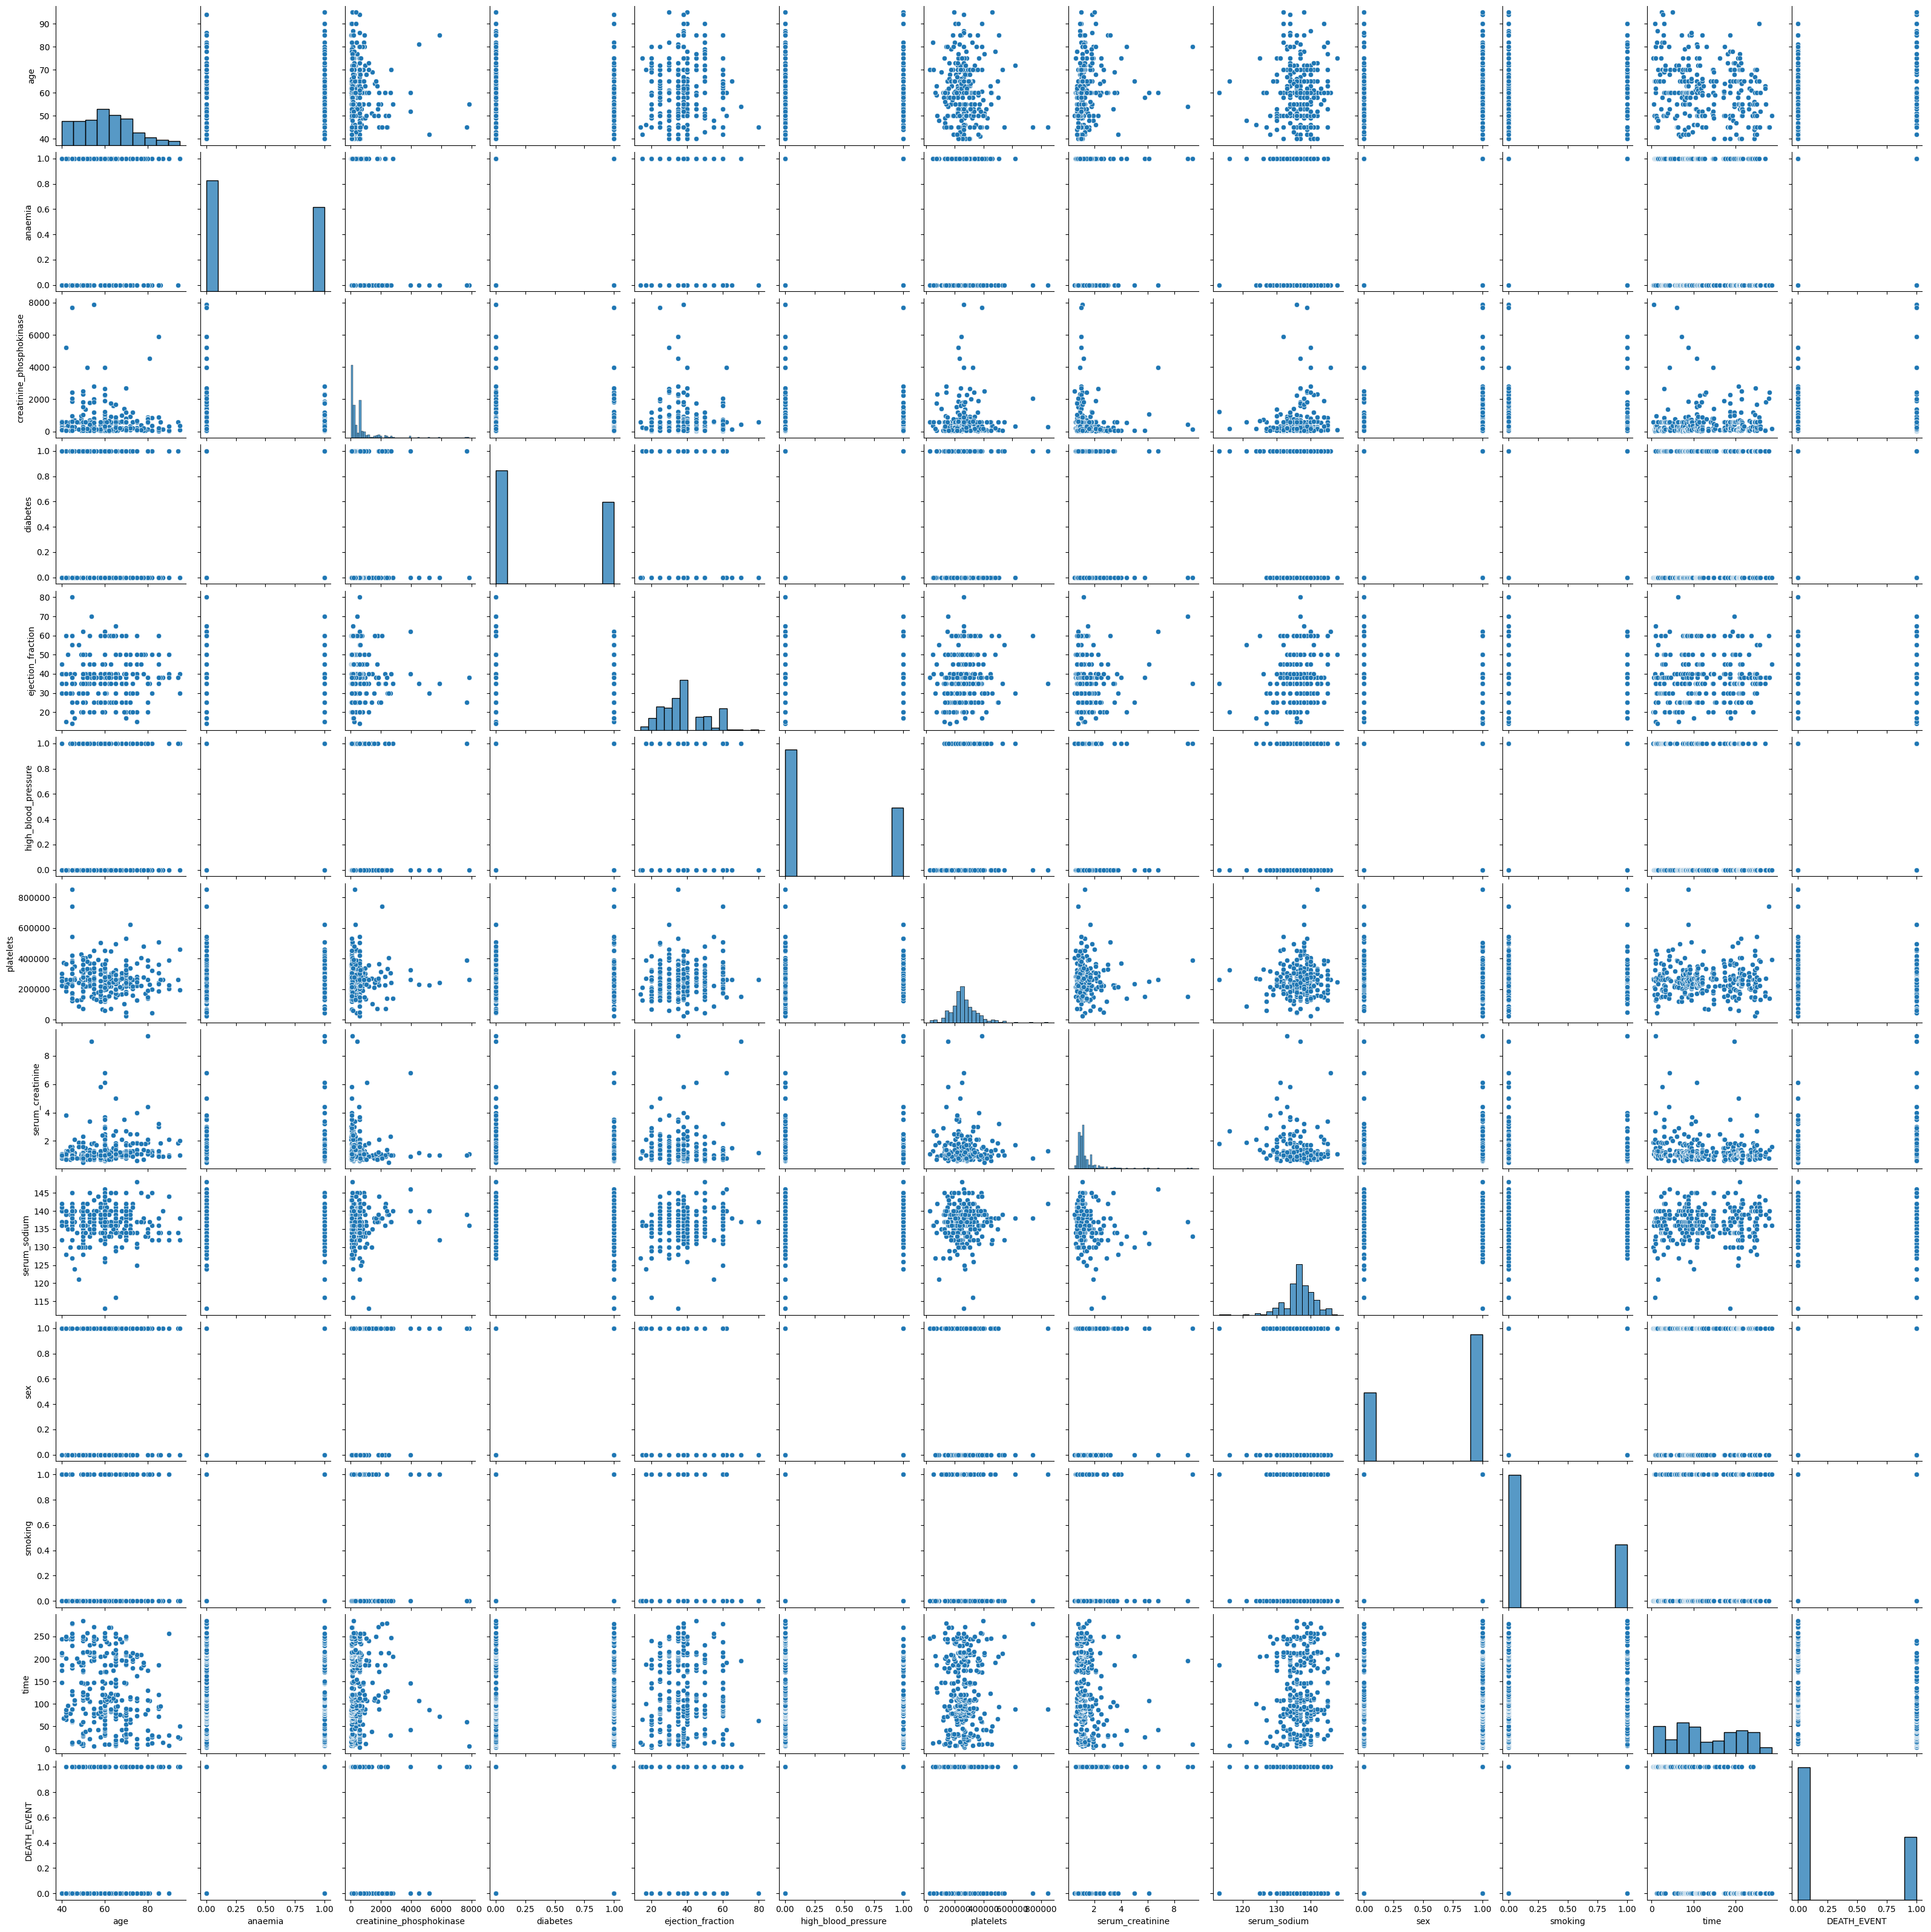

In [16]:
sns.pairplot(data=dataset)

In [17]:
# Percentage of patients who suffered a DEATH_EVENT
death_rate = dataset['DEATH_EVENT'].mean() * 100
print(f"Death Rate: {death_rate:.2f}%")

Death Rate: 32.11%


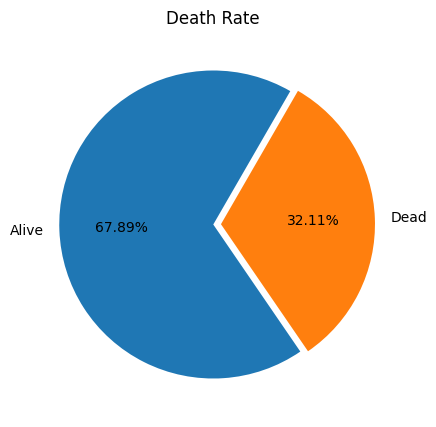

In [18]:
count=dataset["DEATH_EVENT"].value_counts()
values=count.values
label_name=list(count.index)
label_name = [0, 1]
label_mapping = {0: "Alive", 1: "Dead"}              # Using List Comprehension
label_name = [label_mapping[label] for label in label_name]
plt.figure(figsize=(5,5))
plt.pie(count, labels = label_name, autopct = "%1.2f%%", explode=[0,0.05],startangle=60)
plt.title("Death Rate")
plt.show()

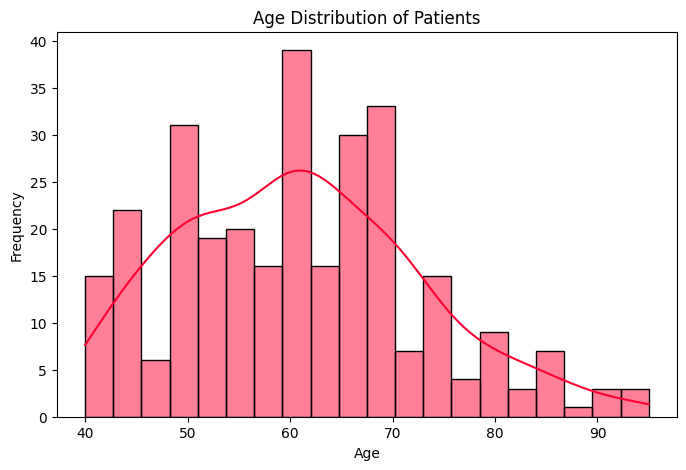

In [19]:
# Distribution of age
plt.figure(figsize=(8,5))
sns.histplot(dataset['age'], bins=20, kde=True, color='#FF0033')
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

In [20]:
# Min and max values for serum creatinine and platelets
print("Serum Creatinine: \n\t Minimum:", dataset['serum_creatinine'].min(), "\n\t Maximum:", dataset['serum_creatinine'].max())
print("Platelets: \n\t Minimum:", dataset['platelets'].min(), "\n\t Maximum:", dataset['platelets'].max())

Serum Creatinine: 
	 Minimum: 0.5 
	 Maximum: 9.4
Platelets: 
	 Minimum: 25100.0 
	 Maximum: 850000.0


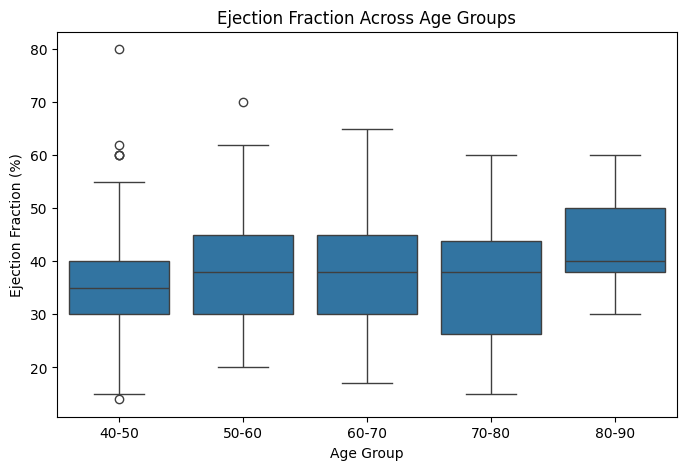

In [21]:
# Ejection fraction variation by age
data1=dataset
data1['age_group'] = pd.cut(data1['age'], bins=[40, 50, 60, 70, 80, 90], labels=["40-50", "50-60", "60-70", "70-80", "80-90"])
plt.figure(figsize=(8,5))
sns.boxplot(x='age_group', y='ejection_fraction', data=data1)
plt.title("Ejection Fraction Across Age Groups")
plt.xlabel("Age Group")
plt.ylabel("Ejection Fraction (%)")
plt.show()

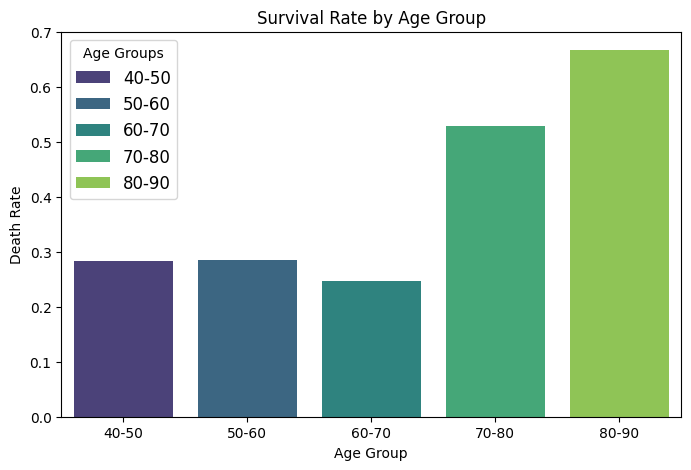

In [22]:
# Survival rate by age group
plt.figure(figsize=(8,5))
sns.barplot(x='age_group', y='DEATH_EVENT', data=dataset, palette='viridis',errorbar=None, hue='age_group')
plt.title("Survival Rate by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Death Rate")
plt.legend(title="Age Groups",fontsize=12)
plt.show()

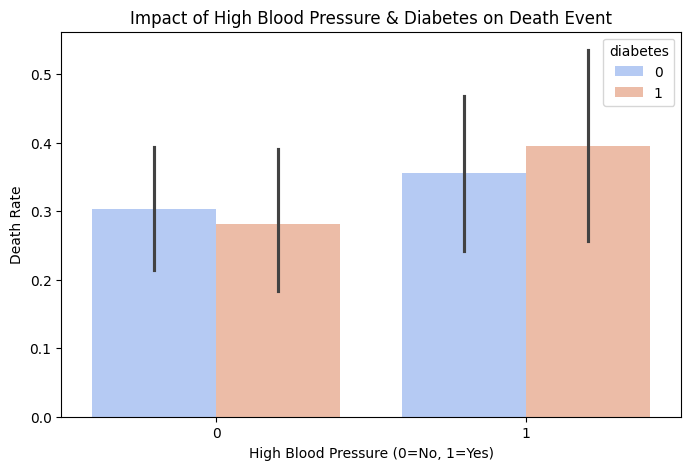

In [23]:
# Impact of high blood pressure and diabetes on mortality
plt.figure(figsize=(8,5))
sns.barplot(x='high_blood_pressure', y='DEATH_EVENT', hue='diabetes', data=dataset, palette='coolwarm')
plt.title("Impact of High Blood Pressure & Diabetes on Death Event")
plt.xlabel("High Blood Pressure (0=No, 1=Yes)")
plt.ylabel("Death Rate")
plt.show()

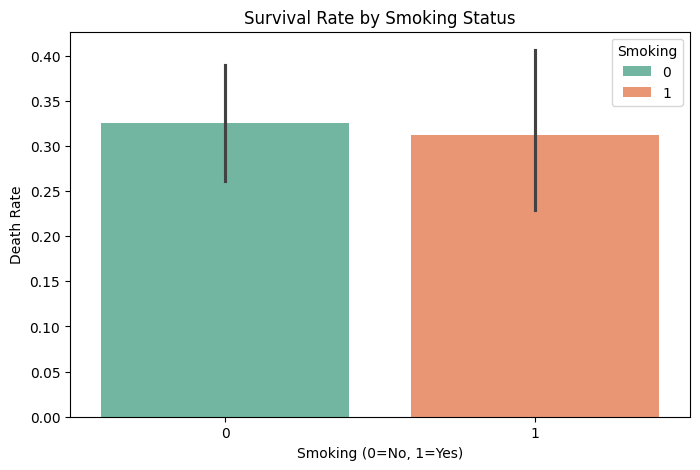

In [24]:
# Survival difference based on smoking
plt.figure(figsize=(8,5))
sns.barplot(x='smoking', y='DEATH_EVENT', data=dataset, palette='Set2', hue="smoking")
plt.title("Survival Rate by Smoking Status")
plt.xlabel("Smoking (0=No, 1=Yes)")
plt.ylabel("Death Rate")
plt.legend(title="Smoking")
plt.show()

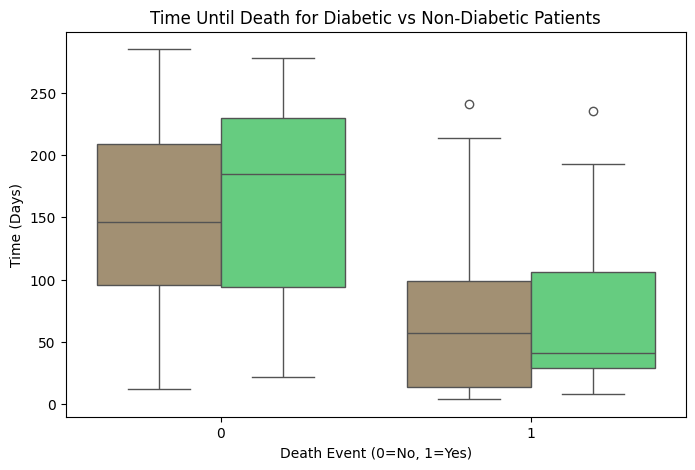

In [25]:
# Time until death for different risk factors
plt.figure(figsize=(8,5))
sns.boxplot(x='DEATH_EVENT', y='time', data=dataset, palette='terrain_r',hue='diabetes', legend=None)
plt.title("Time Until Death for Diabetic vs Non-Diabetic Patients")
plt.xlabel("Death Event (0=No, 1=Yes)")
plt.ylabel("Time (Days)")
plt.show()

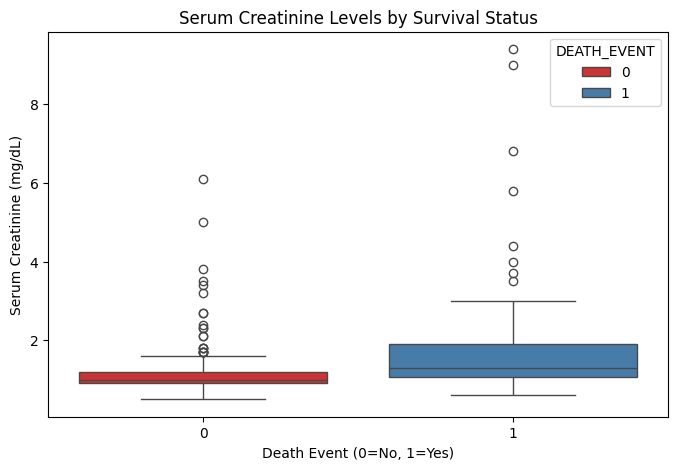

In [26]:
# Relationship between serum creatinine and DEATH_EVENT
plt.figure(figsize=(8,5))
sns.boxplot(x='DEATH_EVENT', y='serum_creatinine', data=dataset, palette='Set1', hue='DEATH_EVENT')
plt.title("Serum Creatinine Levels by Survival Status")
plt.xlabel("Death Event (0=No, 1=Yes)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.show()

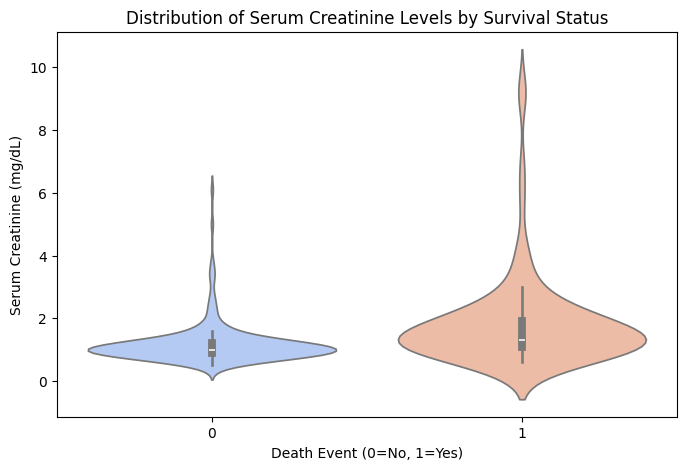

In [27]:
plt.figure(figsize=(8,5))
sns.violinplot(x='DEATH_EVENT', y='serum_creatinine', data=dataset, palette='coolwarm', hue='DEATH_EVENT', legend=None)
plt.title("Distribution of Serum Creatinine Levels by Survival Status")
plt.xlabel("Death Event (0=No, 1=Yes)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.show()

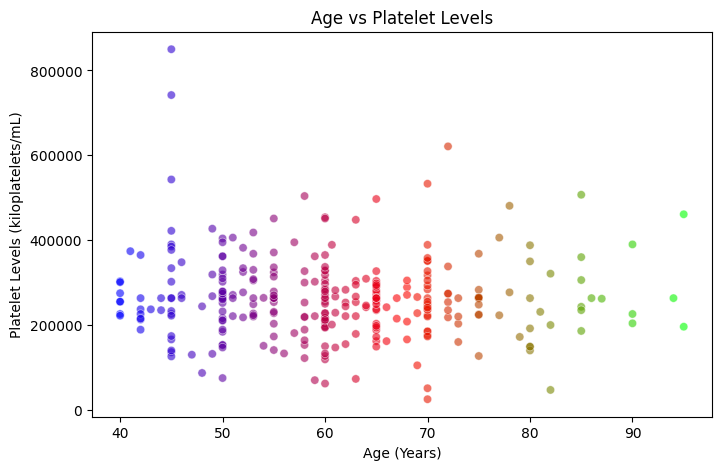

In [28]:
# Correlation between platelet levels and age
plt.figure(figsize=(8,5))
sns.scatterplot(x='age', y='platelets', data=dataset, alpha=0.6, palette='brg', hue="age", legend=None)
plt.title("Age vs Platelet Levels")
plt.xlabel("Age (Years)")
plt.ylabel("Platelet Levels (kiloplatelets/mL)")
plt.show()

Text(0.5, 1.05, 'Platelet Levels vs Age Across Survival Status')

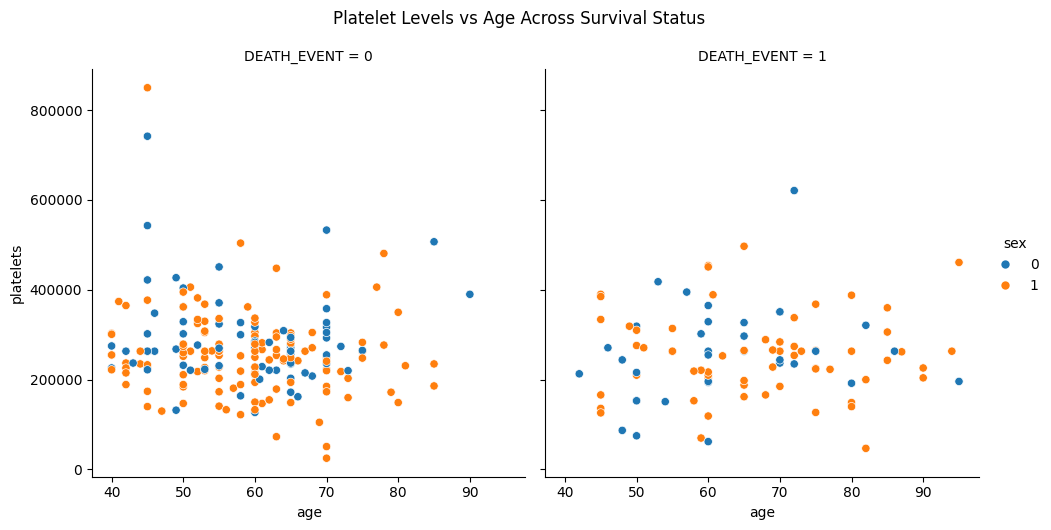

In [29]:
# Platelet Count vs Age across Survival Status
g = sns.relplot(x='age', y='platelets', col='DEATH_EVENT', data=dataset, kind='scatter', hue='sex')
g.fig.suptitle("Platelet Levels vs Age Across Survival Status", y=1.05)

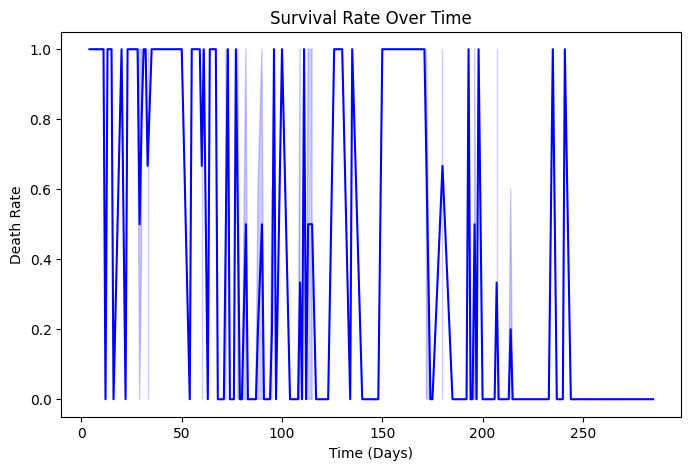

In [30]:
# Survival rate across different time periods
plt.figure(figsize=(8,5))
sns.lineplot(x='time', y='DEATH_EVENT', data=dataset, color='blue')
plt.title("Survival Rate Over Time")
plt.xlabel("Time (Days)")
plt.ylabel("Death Rate")
plt.show()

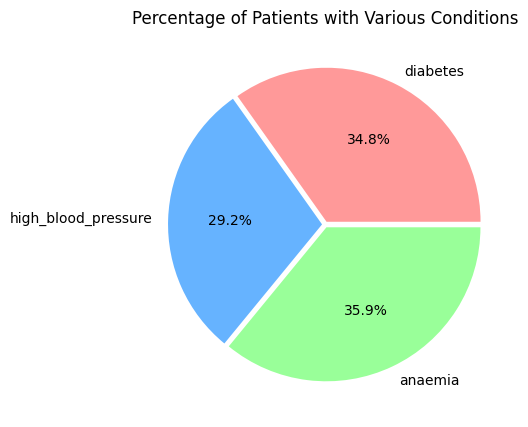

In [31]:
# Percentage of patients with diabetes, high blood pressure, and anaemia
conditions = ['diabetes', 'high_blood_pressure', 'anaemia']
values = [dataset[cond].mean() * 100 for cond in conditions]
plt.figure(figsize=(8,5))
plt.pie(values, labels=conditions, autopct='%1.1f%%', colors=["#ff9999","#66b3ff","#99ff99"],explode=[0.02,0.02,0.02])
plt.title("Percentage of Patients with Various Conditions")
plt.show()


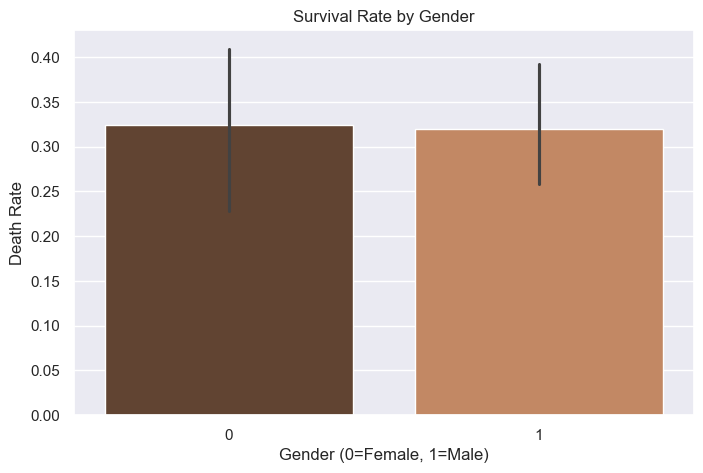

In [32]:
# Difference in survival between male and female patients
sns.set(style="darkgrid")
plt.figure(figsize=(8,5))
sns.barplot(x='sex', y='DEATH_EVENT', data=dataset, palette='copper', hue='sex',legend= None)
plt.title("Survival Rate by Gender")
plt.xlabel("Gender (0=Female, 1=Male)")
plt.ylabel("Death Rate")
plt.show()


Text(0.5, 1.05, 'CPK vs Ejection Fraction Across High Blood Pressure Status')

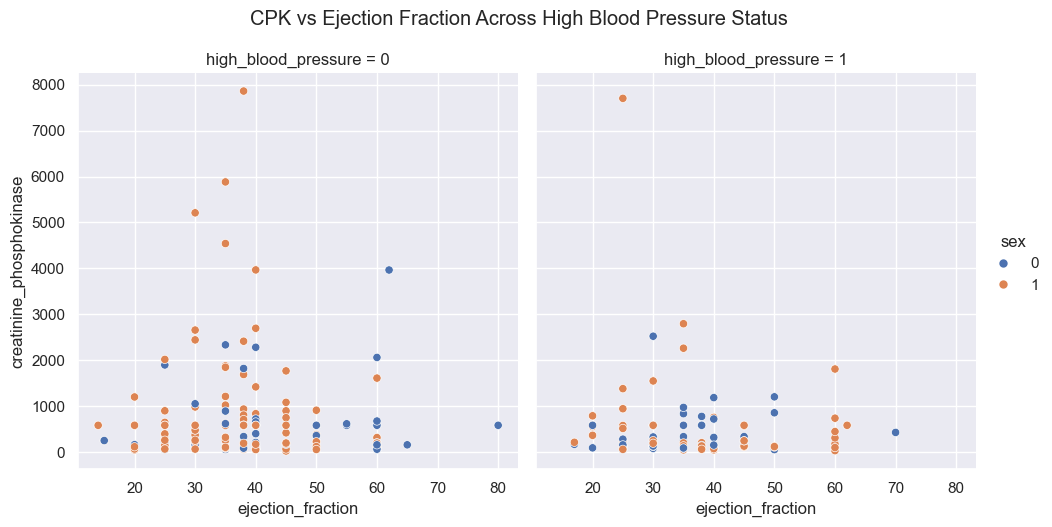

In [33]:
# CPK vs Ejection Fraction across High Blood Pressure Status
g = sns.relplot(x='ejection_fraction', y='creatinine_phosphokinase', col='high_blood_pressure', data=dataset, kind='scatter',hue='sex')
g.fig.suptitle("CPK vs Ejection Fraction Across High Blood Pressure Status", y=1.05)

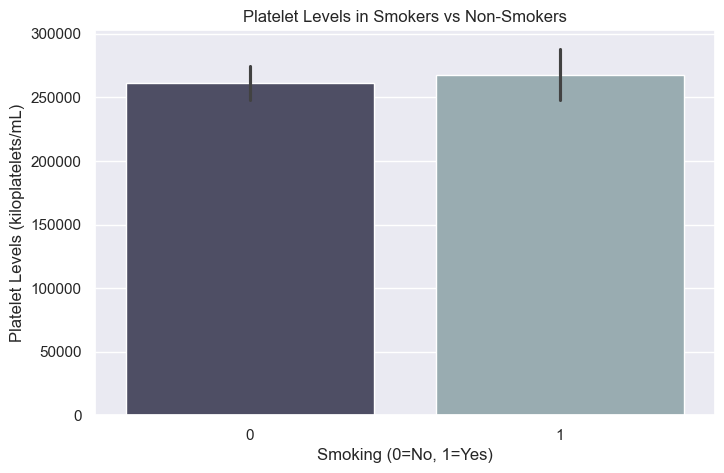

In [34]:
# Mean Platelet Levels in Smokers vs Non-Smokers
plt.figure(figsize=(8,5))
sns.barplot(x='smoking', y='platelets', data=dataset, palette='bone',hue="smoking", legend=None)
plt.title("Platelet Levels in Smokers vs Non-Smokers")
plt.xlabel("Smoking (0=No, 1=Yes)")
plt.ylabel("Platelet Levels (kiloplatelets/mL)")
plt.show()

Text(0.5, 1.05, 'Serum Sodium vs Follow-Up Time Across Diabetes Status')

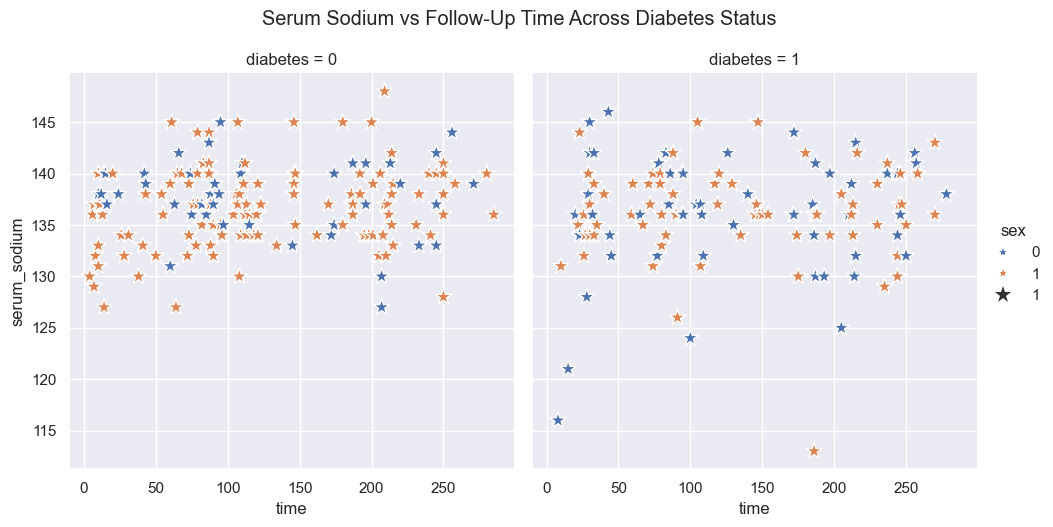

In [35]:
# Serum Sodium vs Follow-Up Time across Diabetes Status
g = sns.relplot(x='time', y='serum_sodium', col='diabetes', data=dataset, kind='scatter',marker="*",hue='sex',size=1, sizes=(150, 300))
g.fig.suptitle("Serum Sodium vs Follow-Up Time Across Diabetes Status", y=1.05)

In [36]:
sns.set(style="white")

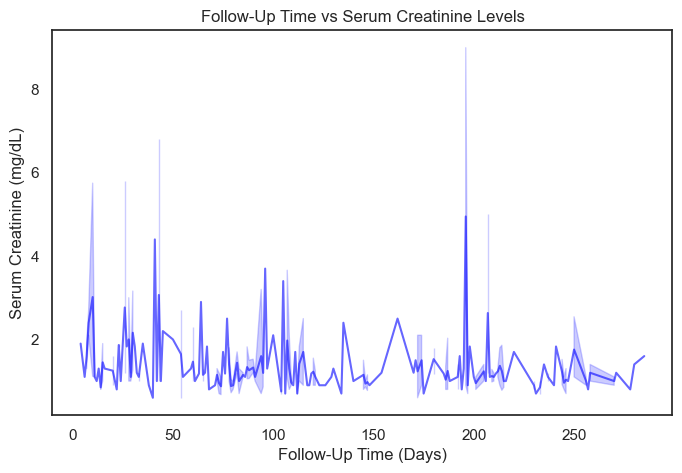

In [37]:
# Relationship Between Serum Creatinine and Follow-Up Time
plt.figure(figsize=(8,5))
sns.lineplot(x='time', y='serum_creatinine', data=dataset, alpha=0.6, color='blue')
plt.title("Follow-Up Time vs Serum Creatinine Levels")
plt.xlabel("Follow-Up Time (Days)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.show()

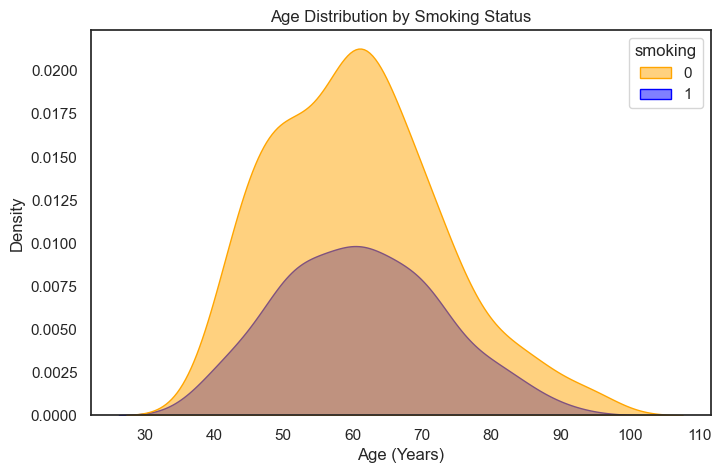

In [38]:
# KDE Plot for Age Distribution by Smoking Status
plt.figure(figsize=(8,5))
sns.kdeplot(data=dataset, x="age", hue="smoking", fill=True, palette=["orange", "blue"], alpha=0.5)
plt.title("Age Distribution by Smoking Status")
plt.xlabel("Age (Years)")
plt.ylabel("Density")
plt.show()

<Figure size 800x500 with 0 Axes>

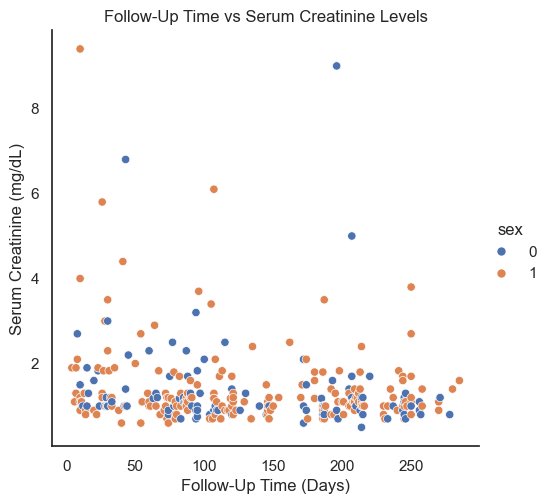

In [39]:
# Relationship Between Serum Creatinine and Follow-Up Time
plt.figure(figsize=(8,5))
sns.relplot(x='time', y='serum_creatinine', data=dataset, color='blue',hue="sex")
plt.title("Follow-Up Time vs Serum Creatinine Levels")
plt.xlabel("Follow-Up Time (Days)")
plt.ylabel("Serum Creatinine (mg/dL)")
plt.show()

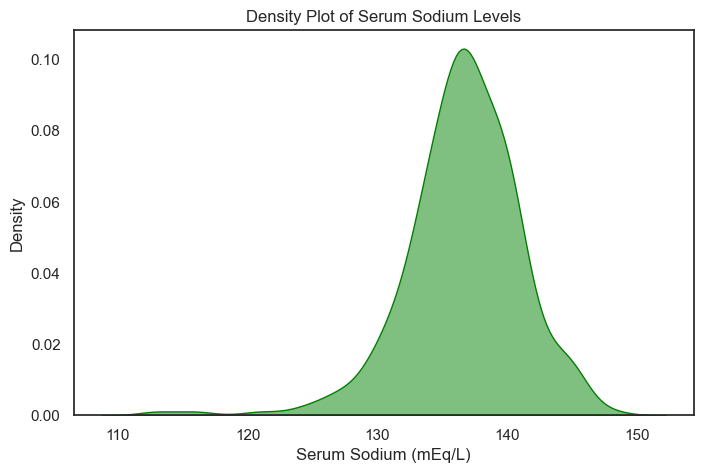

In [40]:
# KDE Plot for Serum Sodium Levels
plt.figure(figsize=(8,5))
sns.kdeplot(dataset["serum_sodium"], fill=True, color='green', alpha=0.5)
plt.title("Density Plot of Serum Sodium Levels")
plt.xlabel("Serum Sodium (mEq/L)")
plt.ylabel("Density")
plt.show()

Text(0.5, 1.05, 'Ejection Fraction vs Age Across Sex')

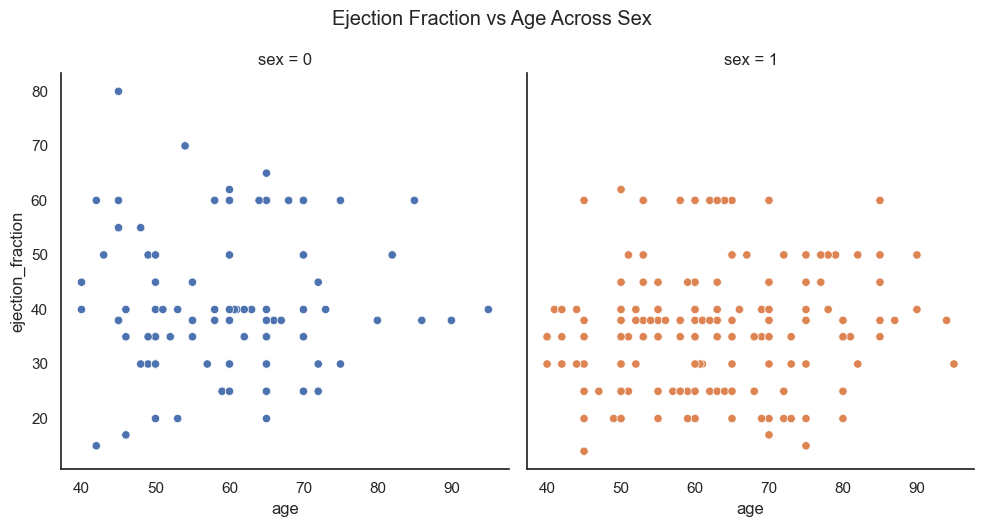

In [41]:
# Ejection Fraction vs Age across Sex
g = sns.relplot(x='age', y='ejection_fraction', col='sex', data=dataset, kind='scatter', height=5, aspect=1, hue="sex",legend=None)
g.fig.suptitle("Ejection Fraction vs Age Across Sex", y=1.05)

Text(0.5, 1.05, 'Serum Creatinine vs Follow-Up Time Across Smoking Status')

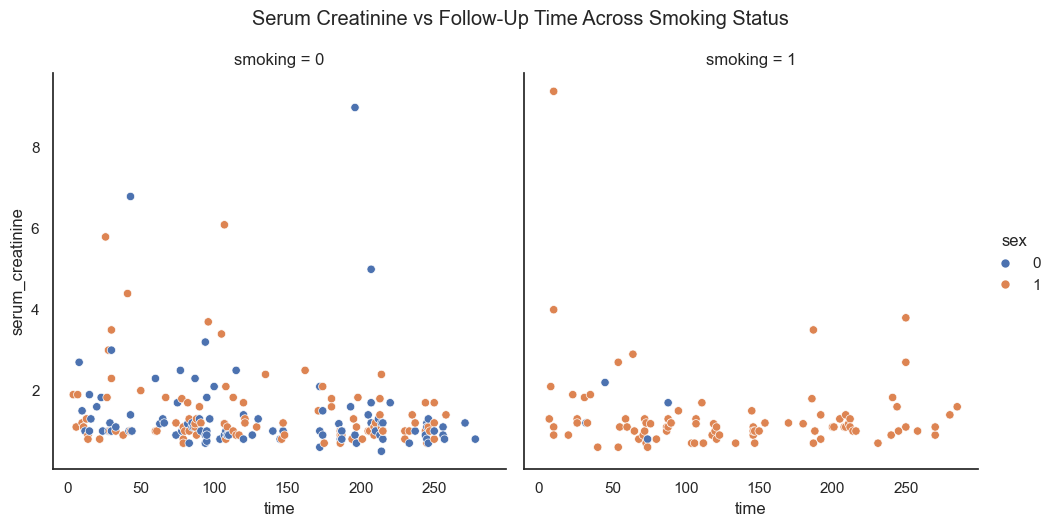

In [42]:
# Serum Creatinine vs Time across Smoking Status
t = sns.relplot(x='time', y='serum_creatinine', col='smoking', data=dataset, kind='scatter',hue="sex")
t.fig.suptitle("Serum Creatinine vs Follow-Up Time Across Smoking Status", y=1.05)

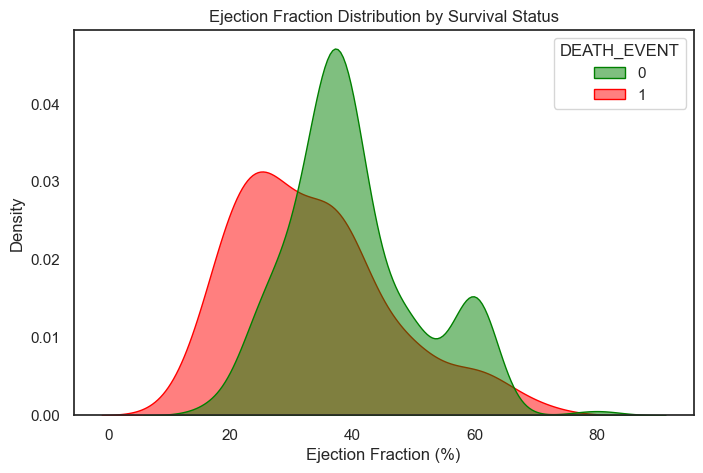

In [43]:
# KDE Plot for Ejection Fraction by Survival Status
plt.figure(figsize=(8,5))
sns.kdeplot(data=dataset, x="ejection_fraction", hue="DEATH_EVENT", fill=True, common_norm=False, palette=["green", "red"], alpha=0.5)
plt.title("Ejection Fraction Distribution by Survival Status")
plt.xlabel("Ejection Fraction (%)")
plt.ylabel("Density")
plt.show()


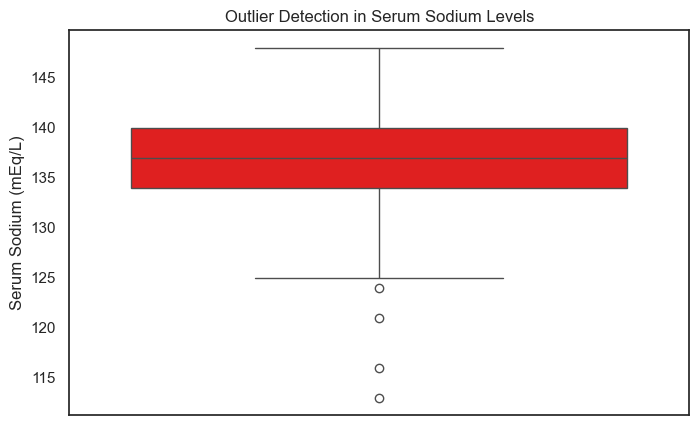

In [44]:
# Outlier Detection in Serum Sodium
plt.figure(figsize=(8,5))
sns.boxplot(y=dataset["serum_sodium"], color='red')
plt.title("Outlier Detection in Serum Sodium Levels")
plt.ylabel("Serum Sodium (mEq/L)")
plt.show()